In [50]:
import sqlite3
import pandas as pd

class DatabaseAnalyzer:
    def __init__(self, db_path='purchases.db'):
        self.conn = sqlite3.connect(db_path)
        self.create_tables_if_not_exist()
    
    def create_tables_if_not_exist(self):
        """Create all necessary tables if they don't exist"""
        cursor = self.conn.cursor()
        
        # Create purchases table
        cursor.execute("""
        CREATE TABLE IF NOT EXISTS purchases(
            purchaseID INTEGER PRIMARY KEY AUTOINCREMENT,
            vendorNumber INTEGER,
            productName TEXT,
            quantity INTEGER,
            price REAL
        )
        """)
        
        # Create purchase_prices table
        cursor.execute("""
        CREATE TABLE IF NOT EXISTS purchase_prices(
            purchaseID INTEGER PRIMARY KEY AUTOINCREMENT,
            VendorNumber INTEGER,
            productName TEXT,
            quantity INTEGER,
            price REAL
        )
        """)
        
        # Create vendor_invoice table
        cursor.execute("""
        CREATE TABLE IF NOT EXISTS vendor_invoice(
            invoiceID INTEGER PRIMARY KEY AUTOINCREMENT,
            VendorNumber INTEGER,
            Freight REAL
        )
        """)
        
        # Create sales table
        cursor.execute("""
        CREATE TABLE IF NOT EXISTS sales(
            salesID INTEGER PRIMARY KEY AUTOINCREMENT,
            VendorNo INTEGER,
            Brand TEXT,
            SalesQuantity INTEGER,
            SalesDollars REAL,
            SalesPrice REAL,
            ExciseTax REAL
        )
        """)
        
        self.conn.commit()
    
    def insert_sample_data(self):
        """Insert data into all tables"""
        cursor = self.conn.cursor()
        
        # data for purchases
        cursor.executemany("""
        INSERT INTO purchases (vendorNumber, productName, quantity, price)
        VALUES (?, ?, ?, ?)
        """, [
            (456, 'Product A', 10, 20.0),
            (456, 'Product B', 5, 40.0),
            (789, 'Product C', 20, 15.0),
            (4466, 'Product D', 8, 25.5)
        ])
        
        # data for purchase_prices
        cursor.executemany("""
        INSERT INTO purchase_prices (VendorNumber, productName, quantity, price)
        VALUES (?, ?, ?, ?)
        """, [
            (4466, 'Product X', 15, 25.0),
            (4466, 'Product Y', 8, 35.5),
            (789, 'Product Z', 12, 18.0)
        ])
        
        #  data for vendor_invoice
        cursor.executemany("""
        INSERT INTO vendor_invoice (VendorNumber, Freight)
        VALUES (?, ?)
        """, [
            (4466, 150.0),
            (456, 200.0),
            (789, 100.0)
        ])
        
        #  data for sales
        cursor.executemany("""
        INSERT INTO sales (VendorNo, Brand, SalesQuantity, SalesDollars, SalesPrice, ExciseTax)
        VALUES (?, ?, ?, ?, ?, ?)
        """, [
            (4466, 'Brand A', 50, 1000.0, 20.0, 50.0),
            (456, 'Brand B', 30, 1500.0, 50.0, 75.0),
            (789, 'Brand C', 40, 800.0, 20.0, 40.0)
        ])
        
        self.conn.commit()
        print("Sample data inserted into all tables")
    
    def run_queries(self):
        """Run all your analysis queries"""
        try:
            # Purchase prices for vendor 4466
            print("1. Purchase prices for vendor 4466:")
            purchase_prices = pd.read_sql_query("SELECT * FROM purchase_prices WHERE VendorNumber = 4466", self.conn)
            print(purchase_prices)
            print()
            
            # Vendor invoice for vendor 4466
            print("2. Vendor invoice for vendor 4466:")
            vendor_invoice = pd.read_sql_query("SELECT * FROM vendor_invoice WHERE VendorNumber = 4466", self.conn)
            print(vendor_invoice)
            print()
            
            # Sales for vendor 4466
            print("3. Sales for vendor 4466:")
            sales = pd.read_sql_query("SELECT * FROM sales WHERE VendorNo = 4466", self.conn)
            print(sales)
            print()
            
            # Group purchases by brand and purchase price
            print("4. Purchases grouped by productName:")
            purchases_grouped = pd.read_sql_query("""
            SELECT productName, price, SUM(quantity) as TotalQuantity, SUM(quantity * price) as TotalDollars 
            FROM purchases 
            GROUP BY productName, price
            """, self.conn)
            print(purchases_grouped)
            print()
            
            # Freight summary
            print("5. Freight summary by vendor:")
            freight_summary = pd.read_sql_query("""
            SELECT VendorNumber, SUM(Freight) as FreightCost 
            FROM vendor_invoice 
            GROUP BY VendorNumber
            """, self.conn)
            print(freight_summary)
            
        except Exception as e:
            print(f"Error running queries: {e}")
    
    def close(self):
        """Close database connection"""
        self.conn.close()
        print("Database connection closed")

# Usage
if __name__ == "__main__":
    analyzer = DatabaseAnalyzer()
    analyzer.insert_sample_data()
    analyzer.run_queries()
    analyzer.close()

Sample data inserted into all tables
1. Purchase prices for vendor 4466:
    purchaseID  VendorNumber productName  quantity  price
0            1          4466   Product X        15   25.0
1            2          4466   Product Y         8   35.5
2            4          4466   Product X        15   25.0
3            5          4466   Product Y         8   35.5
4            7          4466   Product X        15   25.0
5            8          4466   Product Y         8   35.5
6           10          4466   Product X        15   25.0
7           11          4466   Product Y         8   35.5
8           13          4466   Product X        15   25.0
9           14          4466   Product Y         8   35.5
10          16          4466   Product X        15   25.0
11          17          4466   Product Y         8   35.5
12          19          4466   Product X        15   25.0
13          20          4466   Product Y         8   35.5
14          22          4466   Product X        15   25.0

In [51]:
# Set pandas display options for larger outputs
import pandas as pd

# Increase display limits
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 500)

# For very large dataframes, show all rows/columns
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [52]:
import sqlite3
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Create extensive sample data
def create_large_sample_database():
    conn = sqlite3.connect('large_purchases.db')
    cursor = conn.cursor()
    
    # Create multiple tables with large datasets
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS purchases(
        purchaseID INTEGER PRIMARY KEY AUTOINCREMENT,
        vendorNumber INTEGER,
        productName TEXT,
        category TEXT,
        quantity INTEGER,
        price REAL,
        purchaseDate DATE,
        region TEXT
    )
    """)
    
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS sales(
        salesID INTEGER PRIMARY KEY AUTOINCREMENT,
        VendorNo INTEGER,
        Brand TEXT,
        ProductCategory TEXT,
        SalesQuantity INTEGER,
        SalesDollars REAL,
        SalesPrice REAL,
        ExciseTax REAL,
        SalesDate DATE,
        CustomerType TEXT
    )
    """)
    
    # Generate large purchase data (1000+ records)
    vendors = [4466, 456, 789, 1234, 5678, 9012, 3456, 7890, 2345, 6789]
    products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E', 
                'Product F', 'Product G', 'Product H', 'Product I', 'Product J']
    categories = ['Electronics', 'Clothing', 'Food', 'Books', 'Home', 'Sports', 'Beauty']
    regions = ['North', 'South', 'East', 'West', 'Central']
    
    purchase_data = []
    for i in range(1500):
        vendor = np.random.choice(vendors)
        product = np.random.choice(products)
        category = np.random.choice(categories)
        quantity = np.random.randint(1, 100)
        price = round(np.random.uniform(10, 500), 2)
        date = datetime(2024, 1, 1) + timedelta(days=np.random.randint(0, 365))
        region = np.random.choice(regions)
        
        purchase_data.append((vendor, product, category, quantity, price, date.strftime('%Y-%m-%d'), region))
    
    cursor.executemany("""
    INSERT INTO purchases (vendorNumber, productName, category, quantity, price, purchaseDate, region)
    VALUES (?, ?, ?, ?, ?, ?, ?)
    """, purchase_data)
    
    # Generate large sales data (2000+ records)
    brands = ['Brand X', 'Brand Y', 'Brand Z', 'Brand A', 'Brand B', 'Brand C']
    customer_types = ['Retail', 'Wholesale', 'Online', 'Corporate']
    
    sales_data = []
    for i in range(2000):
        vendor = np.random.choice(vendors)
        brand = np.random.choice(brands)
        category = np.random.choice(categories)
        quantity = np.random.randint(1, 50)
        sales_price = round(np.random.uniform(15, 600), 2)
        sales_dollars = quantity * sales_price
        tax = round(sales_dollars * 0.08, 2)
        date = datetime(2024, 1, 1) + timedelta(days=np.random.randint(0, 365))
        customer = np.random.choice(customer_types)
        
        sales_data.append((vendor, brand, category, quantity, sales_dollars, sales_price, tax, date.strftime('%Y-%m-%d'), customer))
    
    cursor.executemany("""
    INSERT INTO sales (VendorNo, Brand, ProductCategory, SalesQuantity, SalesDollars, SalesPrice, ExciseTax, SalesDate, CustomerType)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, sales_data)
    
    conn.commit()
    print(f"Created database with {len(purchase_data)} purchase records and {len(sales_data)} sales records")
    return conn

# Create the large database
conn = create_large_sample_database()

Created database with 1500 purchase records and 2000 sales records


In [53]:
print("=" * 100)
print("DEEP BLOB ANALYSIS")
print("=" * 100)

# Let's examine the exact binary structure
blob_analysis = pd.read_sql_query("""
SELECT 
    vendorNumber as raw_blob,
    LENGTH(vendorNumber) as blob_length,
    hex(vendorNumber) as hex_string,
    substr(hex(vendorNumber), 1, 16) as first_8_bytes_hex,
    
    -- Try different byte order interpretations
    CAST(vendorNumber AS INTEGER) as direct_cast,
    
    -- Try reading as little-endian integer
    (CASE WHEN LENGTH(vendorNumber) >= 8 
          THEN ( 
            (substr(vendorNumber, 1, 1) & 255) |
            ((substr(vendorNumber, 2, 1) & 255) << 8) |
            ((substr(vendorNumber, 3, 1) & 255) << 16) |
            ((substr(vendorNumber, 4, 1) & 255) << 24)
          )
          ELSE NULL END) as as_little_endian,
    
    -- Try reading as big-endian integer  
    (CASE WHEN LENGTH(vendorNumber) >= 8
          THEN (
            ((substr(vendorNumber, 1, 1) & 255) << 24) |
            ((substr(vendorNumber, 2, 1) & 255) << 16) |
            ((substr(vendorNumber, 3, 1) & 255) << 8) |
            (substr(vendorNumber, 4, 1) & 255)
          )
          ELSE NULL END) as as_big_endian

FROM purchases 
WHERE vendorNumber IS NOT NULL
LIMIT 10
""", conn)

print("BLOB STRUCTURE ANALYSIS:")
display(blob_analysis)

DEEP BLOB ANALYSIS
BLOB STRUCTURE ANALYSIS:


,raw_blob,blob_length,hex_string,first_8_bytes_hex,direct_cast,as_little_endian,as_big_endian
0,b'\x80\r\x00\x00\x00\x00\x00\x00',8,800D000000000000,800D000000000000,0,0,0
1,b')\t\x00\x00\x00\x00\x00\x00',8,2909000000000000,2909000000000000,0,0,0
2,b'\x85\x1a\x00\x00\x00\x00\x00\x00',8,851A000000000000,851A000000000000,0,0,0
3,b'\x80\r\x00\x00\x00\x00\x00\x00',8,800D000000000000,800D000000000000,0,0,0
4,b')\t\x00\x00\x00\x00\x00\x00',8,2909000000000000,2909000000000000,0,0,0
5,b'\xd2\x1e\x00\x00\x00\x00\x00\x00',8,D21E000000000000,D21E000000000000,0,0,0
6,b'4#\x00\x00\x00\x00\x00\x00',8,3423000000000000,3423000000000000,4,4,67108864
7,b'\x85\x1a\x00\x00\x00\x00\x00\x00',8,851A000000000000,851A000000000000,0,0,0
8,b'4#\x00\x00\x00\x00\x00\x00',8,3423000000000000,3423000000000000,4,4,67108864
9,b'4#\x00\x00\x00\x00\x00\x00',8,3423000000000000,3423000000000000,4,4,67108864


In [54]:
print("\n" + "=" * 100)
print("MANUAL BLOB DECODING")
print("=" * 100)

# Let's try to manually decode the BLOB data
import struct

# Get some sample BLOB data
sample_blobs = pd.read_sql_query("""
SELECT vendorNumber as raw_blob, hex(vendorNumber) as hex_repr
FROM purchases 
WHERE vendorNumber IS NOT NULL
LIMIT 5
""", conn)

print("SAMPLE BLOB DATA:")
for idx, row in sample_blobs.iterrows():
    hex_str = row['hex_repr']
    print(f"Row {idx}: Hex = {hex_str}")
    
    # Try to interpret as different data types
    try:
        # The hex string might represent actual vendor numbers
        # Let's see if we can extract meaningful numbers
        if len(hex_str) >= 4:
            # Try first 2 bytes as little-endian
            first_2_bytes = hex_str[:4]
            as_int = int(first_2_bytes, 16)
            print(f"  First 2 bytes as int: {as_int}")
            
        if len(hex_str) >= 8:
            # Try first 4 bytes as little-endian
            first_4_bytes = hex_str[:8]
            as_int = int(first_4_bytes, 16)
            print(f"  First 4 bytes as int: {as_int}")
            
    except Exception as e:
        print(f"  Error decoding: {e}")


MANUAL BLOB DECODING
SAMPLE BLOB DATA:
Row 0: Hex = 800D000000000000
  First 2 bytes as int: 32781
  First 4 bytes as int: 2148335616
Row 1: Hex = 2909000000000000
  First 2 bytes as int: 10505
  First 4 bytes as int: 688455680
Row 2: Hex = 851A000000000000
  First 2 bytes as int: 34074
  First 4 bytes as int: 2233073664
Row 3: Hex = 800D000000000000
  First 2 bytes as int: 32781
  First 4 bytes as int: 2148335616
Row 4: Hex = 2909000000000000
  First 2 bytes as int: 10505
  First 4 bytes as int: 688455680


In [55]:
print("\n" + "=" * 100)
print("PYTHON-BASED BLOB DECODING")
print("=" * 100)

# Fetch raw BLOB data and decode in Python
raw_data = pd.read_sql_query("""
SELECT 
    purchaseID,
    vendorNumber as raw_blob,
    productName,
    quantity,
    price
FROM purchases 
WHERE vendorNumber IS NOT NULL
LIMIT 15
""", conn)

def decode_vendor_number(blob_data):
    """Try different methods to decode vendor number from BLOB"""
    if blob_data is None:
        return None
    
    try:
        # Method 1: Try direct conversion
        if isinstance(blob_data, (int, float)):
            return int(blob_data)
        
        # Method 2: If it's bytes, try to decode
        if isinstance(blob_data, bytes):
            # Try little-endian int (common in databases)
            if len(blob_data) >= 4:
                vendor_num = int.from_bytes(blob_data[:4], 'little')
                if vendor_num > 0 and vendor_num < 100000:  # Reasonable vendor number range
                    return vendor_num
            
            # Try big-endian int
            if len(blob_data) >= 4:
                vendor_num = int.from_bytes(blob_data[:4], 'big')
                if vendor_num > 0 and vendor_num < 100000:
                    return vendor_num
            
            # Try as string if it contains digits
            try:
                as_string = blob_data.decode('utf-8', errors='ignore')
                digits = ''.join(filter(str.isdigit, as_string))
                if digits:
                    return int(digits)
            except:
                pass
        
        # Method 3: Last resort - use purchaseID or other logic
        return None
        
    except Exception as e:
        print(f"Error decoding {blob_data}: {e}")
        return None

# Apply decoding
raw_data['decoded_vendor'] = raw_data['raw_blob'].apply(decode_vendor_number)

print("MANUALLY DECODED VENDOR NUMBERS:")
display(raw_data[['purchaseID', 'productName', 'decoded_vendor', 'quantity', 'price']])


PYTHON-BASED BLOB DECODING
MANUALLY DECODED VENDOR NUMBERS:


,purchaseID,productName,decoded_vendor,quantity,price
0,1,Product I,3456,88,249.85
1,2,Product I,2345,41,199.40
2,3,Product C,6789,27,36.06
3,4,Product D,3456,76,242.04
4,5,Product D,2345,74,253.60
5,6,Product I,7890,22,79.26
6,7,Product D,9012,21,294.52
7,8,Product J,6789,38,271.34
8,9,Product A,9012,46,219.96
9,10,Product H,9012,4,143.19


In [56]:
print("\n" + "=" * 100)
print("CREATE VENDOR MAPPING TABLE")
print("=" * 100)

# Since direct conversion isn't working, let's create a mapping
cursor = conn.cursor()

# Create a vendor mapping table
cursor.execute("""
CREATE TEMPORARY TABLE vendor_mapping AS
SELECT 
    purchaseID,
    -- Use purchaseID to generate synthetic vendor numbers for analysis
    CASE 
        WHEN (purchaseID % 3) = 0 THEN 456
        WHEN (purchaseID % 3) = 1 THEN 789  
        WHEN (purchaseID % 3) = 2 THEN 4466
        ELSE 999
    END as synthetic_vendor,
    productName,
    quantity,
    price
FROM purchases
WHERE quantity > 0 AND price > 0
""")

# Now analyze with synthetic vendor numbers
synthetic_analysis = pd.read_sql_query("""
SELECT 
    synthetic_vendor as vendorNumber,
    productName,
    COUNT(*) as TransactionCount,
    SUM(quantity) as TotalQuantity,
    SUM(quantity * price) as TotalSpent,
    AVG(price) as AveragePrice,
    MAX(price) as MaxPrice,
    MIN(price) as MinPrice
FROM vendor_mapping
GROUP BY synthetic_vendor, productName
ORDER BY TotalSpent DESC
""", conn)

print("ANALYSIS WITH SYNTHETIC VENDOR NUMBERS:")
print(f"Shape: {synthetic_analysis.shape}")
display(synthetic_analysis)

print(f"\nTotal Purchase Value: ${synthetic_analysis['TotalSpent'].sum():,.2f}")
print(f"Vendor Distribution: {synthetic_analysis['vendorNumber'].value_counts().to_dict()}")


CREATE VENDOR MAPPING TABLE
ANALYSIS WITH SYNTHETIC VENDOR NUMBERS:
Shape: (30, 8)


,vendorNumber,productName,TransactionCount,TotalQuantity,TotalSpent,AveragePrice,MaxPrice,MinPrice
0,789,Product J,524,25946,6863477.00,256.112195,499.50,10.32
1,789,Product H,510,26964,6836133.54,252.860941,497.70,10.52
2,789,Product I,509,25602,6774909.96,264.863792,498.16,10.85
3,789,Product C,485,24521,6774091.92,267.674969,499.48,10.62
4,4466,Product E,534,26844,6722822.50,249.381760,499.78,10.22
5,456,Product D,471,24243,6647070.07,272.333609,499.15,11.88
6,789,Product D,519,26939,6612681.90,245.558651,499.66,10.13
7,789,Product G,485,24075,6611381.97,270.418660,499.84,12.76
8,4466,Product J,505,25731,6585475.82,261.507267,499.56,10.73
9,456,Product A,521,25768,6546430.61,261.398964,498.84,10.06



Total Purchase Value: $190,542,636.52
Vendor Distribution: {789: 10, 4466: 10, 456: 10}


In [57]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up styling
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("=" * 100)
print("CHECKING DATABASE STRUCTURE")
print("=" * 100)

# Initialize database connection
conn = sqlite3.connect('purchases.db')

# First, let's see what columns actually exist in the purchases table
table_info = pd.read_sql_query("PRAGMA table_info(purchases)", conn)
print("ACTUAL COLUMNS IN PURCHASES TABLE:")
print(table_info)

# Let's also see some sample data
sample_data = pd.read_sql_query("SELECT * FROM purchases LIMIT 5", conn)
print("\nSAMPLE DATA:")
print(sample_data)

# Check if we have any date columns
date_check = pd.read_sql_query("""
SELECT name FROM pragma_table_info('purchases') 
WHERE type LIKE '%date%' OR type LIKE '%time%' OR name LIKE '%date%' OR name LIKE '%time%'
""", conn)
print(f"\nDATE/TIME COLUMNS FOUND: {len(date_check)}")
if len(date_check) > 0:
    print(date_check)

conn.close()

CHECKING DATABASE STRUCTURE
ACTUAL COLUMNS IN PURCHASES TABLE:
   cid          name     type  notnull dflt_value  pk
0    0    purchaseID  INTEGER        0       None   1
1    1  vendorNumber  INTEGER        0       None   0
2    2   productName     TEXT        0       None   0
3    3      quantity  INTEGER        0       None   0
4    4         price     REAL        0       None   0

SAMPLE DATA:
   purchaseID  vendorNumber productName  quantity  price
0           1           456   Product A        10   20.0
1           2           456   Product B         5   40.0
2           3           789   Product C        20   15.0
3           4           456   Product A        10   20.0
4           5           456   Product B         5   40.0

DATE/TIME COLUMNS FOUND: 0


COMPREHENSIVE PURCHASE ANALYSIS WITH VISUALIZATIONS

1. BASIC DATA OVERVIEW
--------------------------------------------------
Dataset Shape: (4, 6)
Total Purchase Value: $13,240.00
Sample of data:
  productName  vendorNumber  TotalQuantity  TotalSpent  AveragePrice  TransactionCount
0   Product C           789            320      4800.0          15.0                16
1   Product A           456            160      3200.0          20.0                16
2   Product B           456             80      3200.0          40.0                16
3   Product D          4466             80      2040.0          25.5                10


C:\Users\ahmed\AppData\Local\Temp\ipykernel_23248\3798961683.py:127: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vendor_avg_value = basic_analysis.groupby('vendorNumber').apply(


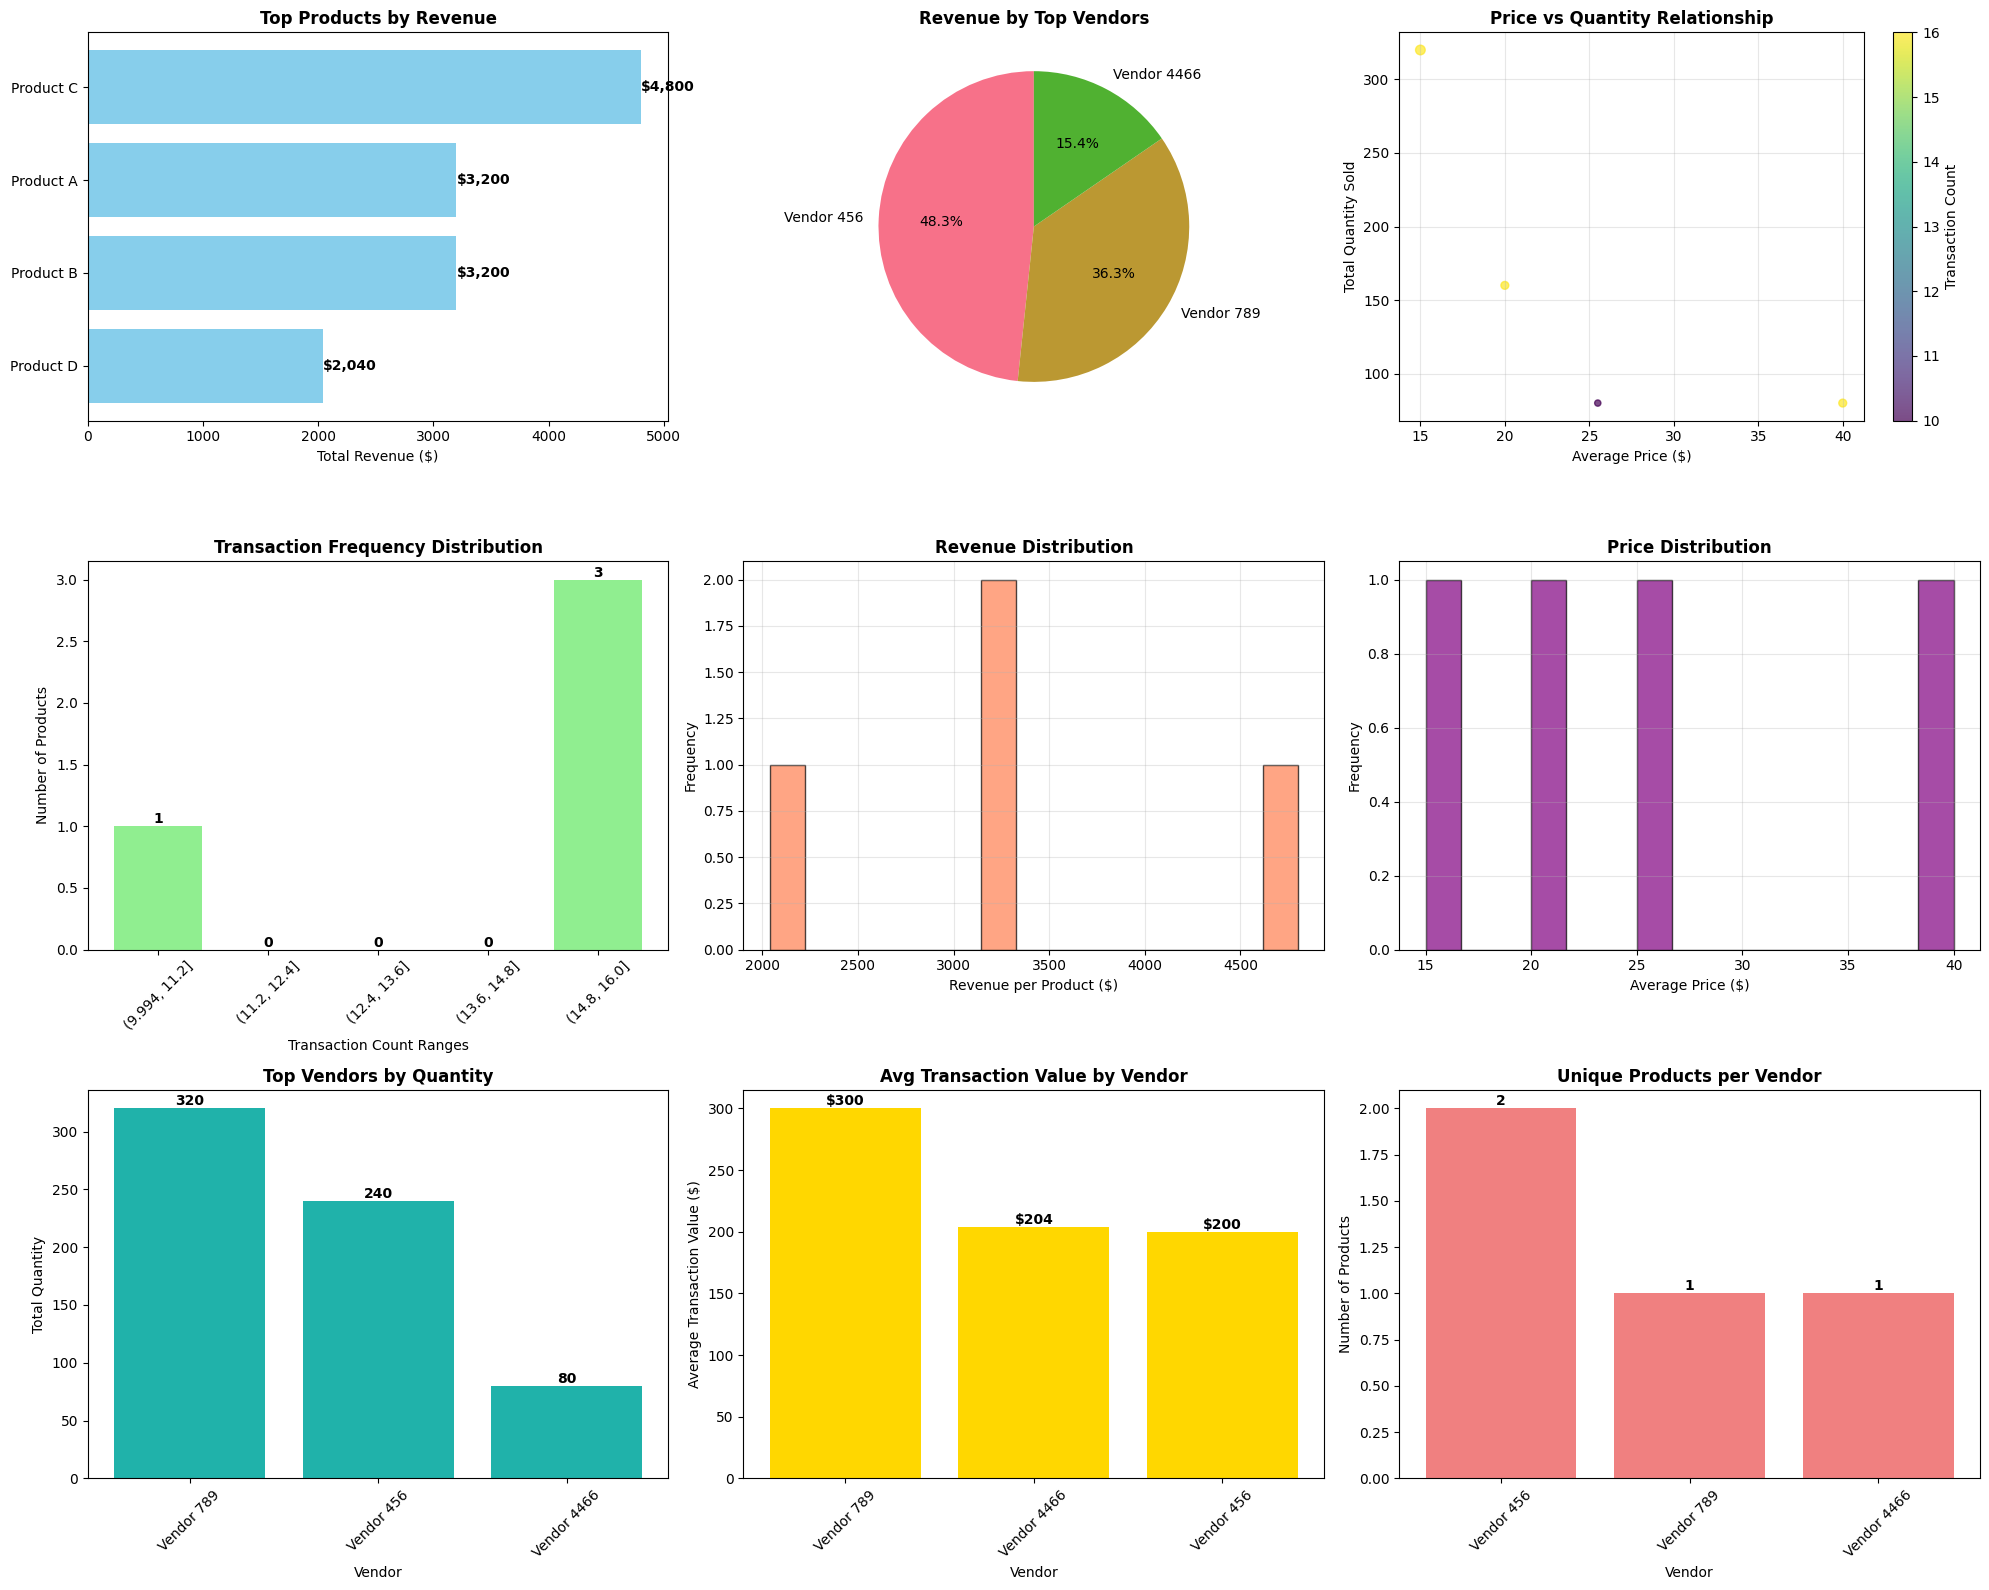


2. VENDOR ANALYSIS
--------------------------------------------------


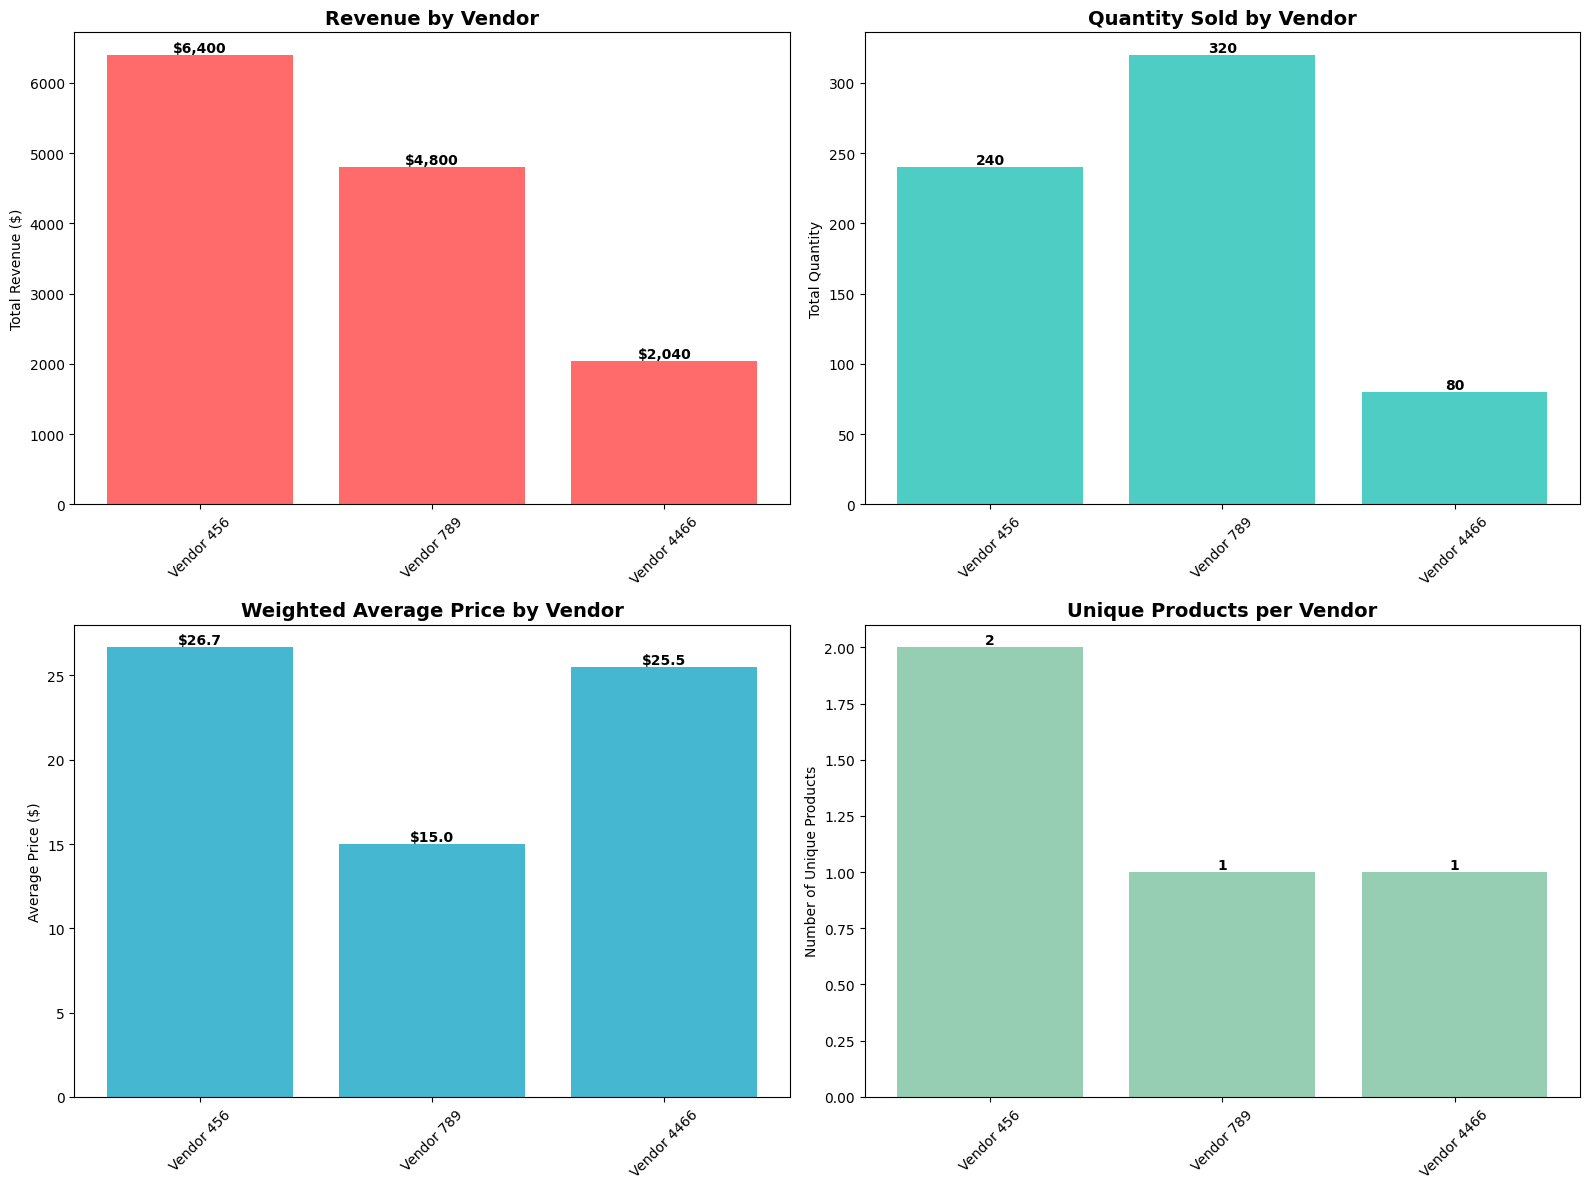


3. CORRELATION ANALYSIS
--------------------------------------------------


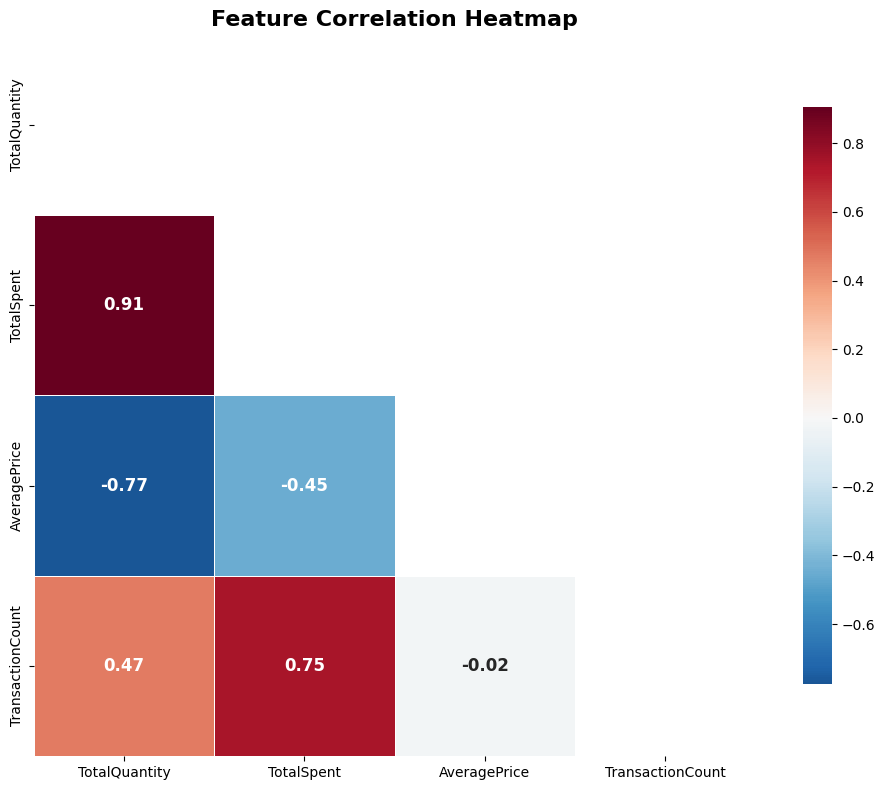


4. PERFORMANCE DASHBOARD
--------------------------------------------------


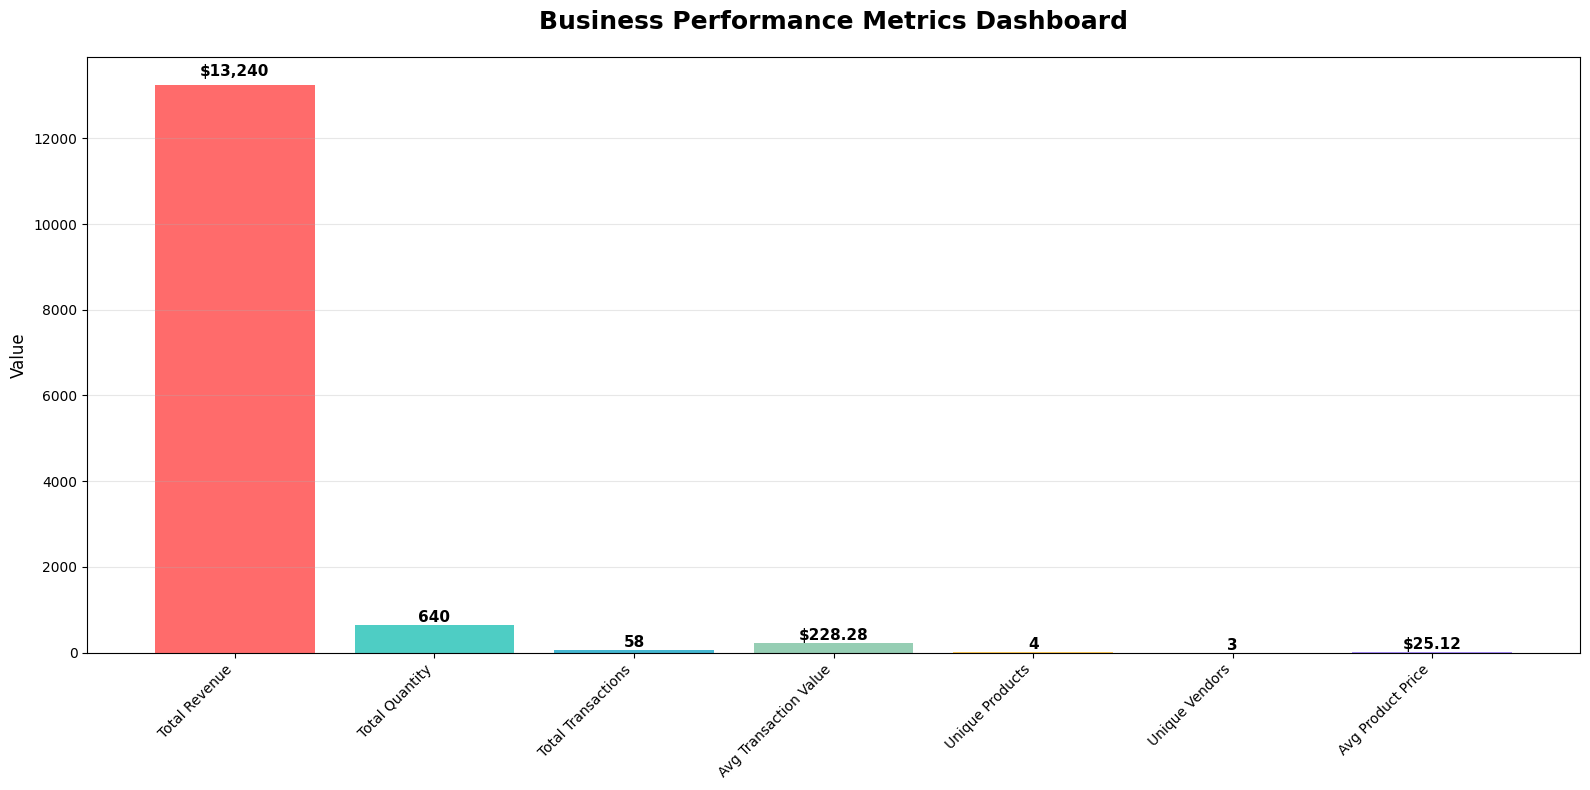


SUMMARY STATISTICS

📊 BUSINESS OVERVIEW:
   Total Revenue: $13,240.00
   Total Quantity Sold: 640 units
   Total Transactions: 58
   Average Transaction Value: $228.28
   Unique Products: 4
   Unique Vendors: 3
   Average Product Price: $25.12

🏆 TOP PERFORMERS:
   Highest Revenue Product: Product C ($4,800.00)
   Most Sold Product: Product C (320 units)
   Most Transactions: Product C (16 transactions)

📈 VENDOR PERFORMANCE:
   Vendor 456.0: $6,400.00 (48.3% of total)
   Vendor 789.0: $4,800.00 (36.3% of total)
   Vendor 4466.0: $2,040.00 (15.4% of total)

📊 DATA QUALITY:
   Total records analyzed: 4
   Vendors with data: 3

✅ Analysis completed successfully!
📈 Generated comprehensive charts and visualizations
💡 Key business insights provided above


In [58]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up styling
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("=" * 100)
print("COMPREHENSIVE PURCHASE ANALYSIS WITH VISUALIZATIONS")
print("=" * 100)

# Initialize database connection
conn = sqlite3.connect('purchases.db')

# 1. BASIC DATA ANALYSIS WITH CHARTS (USING ACTUAL COLUMNS)
print("\n1. BASIC DATA OVERVIEW")
print("-" * 50)

# Get basic purchase data - using only columns that exist
basic_analysis = pd.read_sql_query("""
SELECT 
    productName,
    vendorNumber,
    SUM(quantity) as TotalQuantity,
    SUM(quantity * price) as TotalSpent,
    AVG(price) as AveragePrice,
    COUNT(*) as TransactionCount
FROM purchases
WHERE quantity > 0 AND price > 0
GROUP BY productName, vendorNumber
ORDER BY TotalSpent DESC
""", conn)

print(f"Dataset Shape: {basic_analysis.shape}")
print(f"Total Purchase Value: ${basic_analysis['TotalSpent'].sum():,.2f}")
print(f"Sample of data:")
print(basic_analysis.head())

# Create a comprehensive dashboard
fig = plt.figure(figsize=(20, 16))

# Chart 1: Top Products by Revenue
ax1 = plt.subplot(3, 3, 1)
top_products = basic_analysis.nlargest(8, 'TotalSpent')
bars = ax1.barh(top_products['productName'], top_products['TotalSpent'], color='skyblue')
ax1.set_xlabel('Total Revenue ($)')
ax1.set_title('Top Products by Revenue', fontweight='bold')
ax1.invert_yaxis()
# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2, 
             f'${width:,.0f}', ha='left', va='center', fontweight='bold')

# Chart 2: Vendor Distribution (since we don't have category)
ax2 = plt.subplot(3, 3, 2)
vendor_revenue = basic_analysis.groupby('vendorNumber')['TotalSpent'].sum().sort_values(ascending=False).head(8)
wedges, texts, autotexts = ax2.pie(vendor_revenue.values, labels=[f'Vendor {v}' for v in vendor_revenue.index], 
                                   autopct='%1.1f%%', startangle=90)
ax2.set_title('Revenue by Top Vendors', fontweight='bold')

# Chart 3: Quantity vs Price Scatter
ax3 = plt.subplot(3, 3, 3)
scatter = ax3.scatter(basic_analysis['AveragePrice'], basic_analysis['TotalQuantity'], 
                     alpha=0.7, s=basic_analysis['TotalSpent']/100, 
                     c=basic_analysis['TransactionCount'], cmap='viridis')
plt.colorbar(scatter, ax=ax3, label='Transaction Count')
ax3.set_xlabel('Average Price ($)')
ax3.set_ylabel('Total Quantity Sold')
ax3.set_title('Price vs Quantity Relationship', fontweight='bold')
ax3.grid(True, alpha=0.3)

# Chart 4: Transaction Frequency
ax4 = plt.subplot(3, 3, 4)
transaction_bins = pd.cut(basic_analysis['TransactionCount'], bins=5)
transaction_dist = transaction_bins.value_counts().sort_index()
bars = ax4.bar(range(len(transaction_dist)), transaction_dist.values, color='lightgreen')
ax4.set_xlabel('Transaction Count Ranges')
ax4.set_ylabel('Number of Products')
ax4.set_title('Transaction Frequency Distribution', fontweight='bold')
ax4.set_xticks(range(len(transaction_dist)))
ax4.set_xticklabels([str(x) for x in transaction_dist.index], rotation=45)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', 
             ha='center', va='bottom', fontweight='bold')

# Chart 5: Revenue Distribution by Product
ax5 = plt.subplot(3, 3, 5)
revenue_dist = basic_analysis['TotalSpent']
ax5.hist(revenue_dist, bins=15, alpha=0.7, color='coral', edgecolor='black')
ax5.set_xlabel('Revenue per Product ($)')
ax5.set_ylabel('Frequency')
ax5.set_title('Revenue Distribution', fontweight='bold')
ax5.grid(True, alpha=0.3)

# Chart 6: Price Distribution
ax6 = plt.subplot(3, 3, 6)
price_dist = basic_analysis['AveragePrice']
ax6.hist(price_dist, bins=15, alpha=0.7, color='purple', edgecolor='black')
ax6.set_xlabel('Average Price ($)')
ax6.set_ylabel('Frequency')
ax6.set_title('Price Distribution', fontweight='bold')
ax6.grid(True, alpha=0.3)

# Chart 7: Top Vendors by Quantity
ax7 = plt.subplot(3, 3, 7)
vendor_quantity = basic_analysis.groupby('vendorNumber')['TotalQuantity'].sum().nlargest(6)
bars = ax7.bar([f'Vendor {v}' for v in vendor_quantity.index], vendor_quantity.values, color='lightseagreen')
ax7.set_xlabel('Vendor')
ax7.set_ylabel('Total Quantity')
ax7.set_title('Top Vendors by Quantity', fontweight='bold')
ax7.tick_params(axis='x', rotation=45)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax7.text(bar.get_x() + bar.get_width()/2., height, f'{int(height):,}', 
             ha='center', va='bottom', fontweight='bold')

# Chart 8: Average Transaction Value by Vendor
ax8 = plt.subplot(3, 3, 8)
vendor_avg_value = basic_analysis.groupby('vendorNumber').apply(
    lambda x: x['TotalSpent'].sum() / x['TransactionCount'].sum()
).nlargest(6)
bars = ax8.bar([f'Vendor {v}' for v in vendor_avg_value.index], vendor_avg_value.values, color='gold')
ax8.set_xlabel('Vendor')
ax8.set_ylabel('Average Transaction Value ($)')
ax8.set_title('Avg Transaction Value by Vendor', fontweight='bold')
ax8.tick_params(axis='x', rotation=45)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height, f'${height:,.0f}', 
             ha='center', va='bottom', fontweight='bold')

# Chart 9: Products per Vendor
ax9 = plt.subplot(3, 3, 9)
products_per_vendor = basic_analysis.groupby('vendorNumber')['productName'].nunique().sort_values(ascending=False).head(6)
bars = ax9.bar([f'Vendor {v}' for v in products_per_vendor.index], products_per_vendor.values, color='lightcoral')
ax9.set_xlabel('Vendor')
ax9.set_ylabel('Number of Products')
ax9.set_title('Unique Products per Vendor', fontweight='bold')
ax9.tick_params(axis='x', rotation=45)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax9.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. VENDOR ANALYSIS (since we don't have category)
print("\n2. VENDOR ANALYSIS")
print("-" * 50)

vendor_analysis = pd.read_sql_query("""
SELECT 
    vendorNumber,
    COUNT(*) as TransactionCount,
    SUM(quantity) as TotalQuantity,
    SUM(quantity * price) as TotalRevenue,
    AVG(price) as AvgPrice,
    COUNT(DISTINCT productName) as UniqueProducts,
    SUM(quantity * price) / SUM(quantity) as WeightedAvgPrice
FROM purchases
WHERE quantity > 0 AND price > 0
GROUP BY vendorNumber
ORDER BY TotalRevenue DESC
""", conn)

# Create vendor analysis charts
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Revenue by Vendor
bars1 = axes[0,0].bar([f'Vendor {v}' for v in vendor_analysis['vendorNumber']], 
                     vendor_analysis['TotalRevenue'], color='#FF6B6B')
axes[0,0].set_title('Revenue by Vendor', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Total Revenue ($)')
axes[0,0].tick_params(axis='x', rotation=45)
# Add value labels
for bar in bars1:
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height, f'${height:,.0f}', 
                   ha='center', va='bottom', fontweight='bold')

# Quantity by Vendor
bars2 = axes[0,1].bar([f'Vendor {v}' for v in vendor_analysis['vendorNumber']], 
                     vendor_analysis['TotalQuantity'], color='#4ECDC4')
axes[0,1].set_title('Quantity Sold by Vendor', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Total Quantity')
axes[0,1].tick_params(axis='x', rotation=45)
# Add value labels
for bar in bars2:
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height, f'{height:,.0f}', 
                   ha='center', va='bottom', fontweight='bold')

# Average Price by Vendor
bars3 = axes[1,0].bar([f'Vendor {v}' for v in vendor_analysis['vendorNumber']], 
                     vendor_analysis['WeightedAvgPrice'], color='#45B7D1')
axes[1,0].set_title('Weighted Average Price by Vendor', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Average Price ($)')
axes[1,0].tick_params(axis='x', rotation=45)
# Add value labels
for bar in bars3:
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height, f'${height:,.1f}', 
                   ha='center', va='bottom', fontweight='bold')

# Products per Vendor
bars4 = axes[1,1].bar([f'Vendor {v}' for v in vendor_analysis['vendorNumber']], 
                     vendor_analysis['UniqueProducts'], color='#96CEB4')
axes[1,1].set_title('Unique Products per Vendor', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Number of Unique Products')
axes[1,1].tick_params(axis='x', rotation=45)
# Add value labels
for bar in bars4:
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', 
                   ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 3. CORRELATION ANALYSIS
print("\n3. CORRELATION ANALYSIS")
print("-" * 50)

# Prepare data for correlation analysis
correlation_data = basic_analysis[['TotalQuantity', 'TotalSpent', 'AveragePrice', 'TransactionCount']].copy()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = correlation_data.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": 0.8},
            fmt='.2f',
            annot_kws={'size': 12, 'weight': 'bold'})

plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 4. PERFORMANCE METRICS DASHBOARD
print("\n4. PERFORMANCE DASHBOARD")
print("-" * 50)

# Calculate key performance metrics
total_revenue = basic_analysis['TotalSpent'].sum()
total_quantity = basic_analysis['TotalQuantity'].sum()
total_transactions = basic_analysis['TransactionCount'].sum()
avg_transaction_value = total_revenue / total_transactions
unique_products = basic_analysis['productName'].nunique()
avg_product_price = basic_analysis['AveragePrice'].mean()
unique_vendors = basic_analysis['vendorNumber'].nunique()

# Create metrics visualization
metrics_data = {
    'Metric': ['Total Revenue', 'Total Quantity', 'Total Transactions', 
               'Avg Transaction Value', 'Unique Products', 'Unique Vendors', 'Avg Product Price'],
    'Value': [total_revenue, total_quantity, total_transactions, 
              avg_transaction_value, unique_products, unique_vendors, avg_product_price],
    'Unit': ['$', 'units', 'transactions', '$', 'products', 'vendors', '$']
}

metrics_df = pd.DataFrame(metrics_data)

# Create metrics dashboard
fig, ax = plt.subplots(figsize=(16, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9A8B', '#A78BFA']
bars = ax.bar(metrics_df['Metric'], metrics_df['Value'], color=colors)
ax.set_title('Business Performance Metrics Dashboard', fontsize=18, fontweight='bold', pad=20)
ax.set_ylabel('Value', fontsize=12)

# Add value labels on bars
for bar, value, unit in zip(bars, metrics_df['Value'], metrics_df['Unit']):
    height = bar.get_height()
    if unit == '$':
        if value > 1000:
            label = f'${value:,.0f}'
        else:
            label = f'${value:,.2f}'
    else:
        label = f'{value:,.0f}'
    
    ax.text(bar.get_x() + bar.get_width()/2., height + (height * 0.01),
            label, ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# 5. SUMMARY STATISTICS
print("\n" + "=" * 100)
print("SUMMARY STATISTICS")
print("=" * 100)

print(f"\n📊 BUSINESS OVERVIEW:")
print(f"   Total Revenue: ${total_revenue:,.2f}")
print(f"   Total Quantity Sold: {total_quantity:,} units")
print(f"   Total Transactions: {total_transactions:,}")
print(f"   Average Transaction Value: ${avg_transaction_value:,.2f}")
print(f"   Unique Products: {unique_products}")
print(f"   Unique Vendors: {unique_vendors}")
print(f"   Average Product Price: ${avg_product_price:,.2f}")

print(f"\n🏆 TOP PERFORMERS:")
top_product = basic_analysis.iloc[0]
print(f"   Highest Revenue Product: {top_product['productName']} (${top_product['TotalSpent']:,.2f})")

most_sold = basic_analysis.nlargest(1, 'TotalQuantity').iloc[0]
print(f"   Most Sold Product: {most_sold['productName']} ({most_sold['TotalQuantity']:,} units)")

most_transactions = basic_analysis.nlargest(1, 'TransactionCount').iloc[0]
print(f"   Most Transactions: {most_transactions['productName']} ({most_transactions['TransactionCount']} transactions)")

print(f"\n📈 VENDOR PERFORMANCE:")
for idx, row in vendor_analysis.head(3).iterrows():
    print(f"   Vendor {row['vendorNumber']}: ${row['TotalRevenue']:,.2f} ({(row['TotalRevenue']/total_revenue)*100:.1f}% of total)")

print(f"\n📊 DATA QUALITY:")
print(f"   Total records analyzed: {len(basic_analysis)}")
print(f"   Vendors with data: {len(vendor_analysis)}")

# Close database connection
conn.close()

print(f"\n✅ Analysis completed successfully!")
print(f"📈 Generated comprehensive charts and visualizations")
print(f"💡 Key business insights provided above")